In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

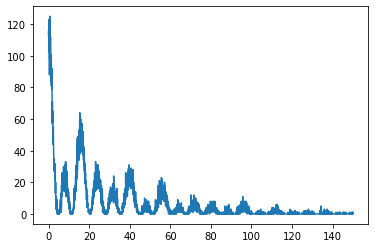

In [4]:
#reading intensity data from experiment
data= np.loadtxt("/Users/ankitanegi/Documents/project 2 - PTYCHOGRAPHY/PROGRAMS/test.dat")
plt.plot(data[:,0],data[:,1])


### Gerchberg-Saxton iterative algorithm


There are many ways to define the DFT, varying in the sign of the exponent, normalization, etc. In the numpy.fft implementation, the DFT is defined as   
  
![image info](https://numpy.org/doc/stable/_images/math/192fb50712b8530c868a329a12a27077c012daa9.svg)  

and the INVERSE DFT as  


![image info](https://numpy.org/doc/stable/_images/math/7de8229bc434f3dfae9b186316c1721563f46ef7.svg) 

Default normalisation is {“backward”}. It indicates which direction of the forward/backward pair of transforms is scaled and with what normalization factor.



[(Source in the numpy website)](https://numpy.org/doc/stable/reference/routines.fft.html#module-numpy.fft) 

In [5]:
ffty= np.fft.rfft(data[:,1]) #fourier transform the intensities

fftx=np.linspace(0.0, 1/data[1,0],int(len(data)/2+1)) # sampling frequency = 1/deltat

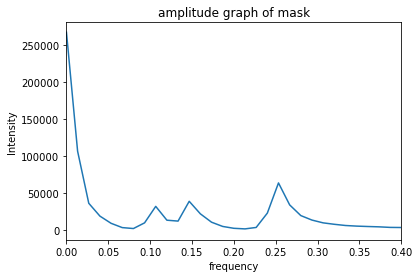

In [6]:
fig,ax= plt.subplots()
ax.set(xlabel = "frequency",
       ylabel = "Intensity",
       title = "amplitude graph of mask")
ax.set_xlim(0.0, 0.4)
ax.plot(fftx, 2/len(data)*np.abs(ffty[:len(data)])**2)
plt.show()

## Ptychography

In [7]:
#SIMULATE EXPERIMENT DATA 

#sample spectrum
w_0= 14.4 #(keV)
fwhm_0= 1#neV
w=np.linspace(5,25,100)
sample_amp = 1/(1+4*(w-w_0)**2/fwhm_0**2) #normalised
sample_phase = math.pi/(1+np.exp(-2*(w-w_0)))


#mask spectrum
w_0= 14.4 #(keV)
fwhm_0= 1 #neV
w=np.linspace(5,25,100)#linewidth
mask_amp = 1/(1+4*(w-w_0)**2/fwhm_0**2) #normalised
mask_phase = math.pi/(1+np.exp(-2*(w-w_0)))

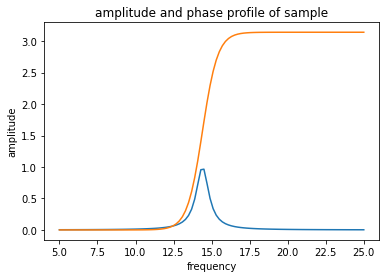

In [8]:
fig,ax= plt.subplots()
ax.plot(w, sample_amp)
ax.plot(w, sample_phase)
ax.set(xlabel = "frequency",
       ylabel = "amplitude",
       title = "amplitude and phase profile of sample")
plt.show()

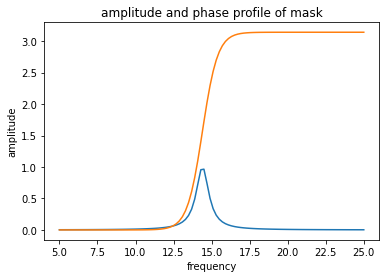

In [9]:
fig,ax= plt.subplots()
ax.plot(w, mask_amp)
ax.plot(w, mask_phase)
ax.set(xlabel = "frequency",
       ylabel = "amplitude",
       title = "amplitude and phase profile of mask")
plt.show()

In [10]:
#convoluted function in time domain = inverse FT the pointwise product of the two functions in freq domain
sample_data = sample_amp*np.exp(1j*sample_phase)
mask_data   = mask_amp*np.exp(1j*mask_phase)
exp_data= sample_data*mask_data
exp_amp = np.abs(exp_data)
exp_phase = np.angle(exp_data)

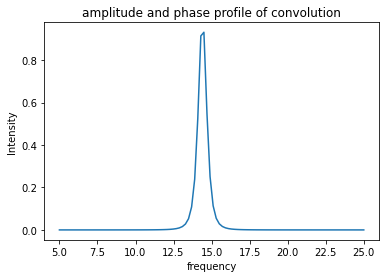

In [11]:
fig,ax= plt.subplots()
ax.plot(w, exp_amp)
#ax.plot(w, exp_phase)
ax.set(xlabel = "frequency",
       ylabel = "Intensity",
       title = "amplitude and phase profile of convolution")
plt.show()

In [12]:
#Inverse fourier transform to get the image data at the detector
detector_img= np.fft.ifft(exp_data)
img_freq = np.linspace(0,1/w[1]*4135, len(exp_data))

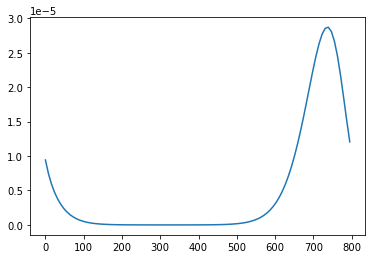

In [13]:
fig,ax= plt.subplots()
ax.plot(img_freq,2/len(detector_img)*np.abs(detector_img)**2)
plt.show()

In [27]:
#generate copies with detunings:

def get_spectrum(E_detuning): #in keV
    #1. take sample spectrum
    #2. take detuned masked spectrum
    #3. convolute and get the image at the detector
    #4. GET A LIST of images with different detunings
    
    #sample spectrum
    w=np.linspace(5,25,100)
    sample_w_0= 14.4 #(keV)
    sample_fwhm_0= 1 #neV

    sample_amp = 1/(1+4*(w-sample_w_0)**2/sample_fwhm_0**2) #normalised
    sample_phase = math.pi/(1+np.exp(-2*(w-sample_w_0)))


    #mask spectrum
    mask_w_0= 14.4 #(keV)
    mask_fwhm_0= 1 #neV
    mask_amp = 1/(1+4*(w-(mask_w_0+E_detuning))**2/mask_fwhm_0**2)
    mask_phase = math.pi/(1+np.exp(-2*(w-(mask_w_0+E_detuning))))

    #w=np.linspace(5,25,100)
    #mask_amp = 1/(1+4*(w-w_0)**2/fwhm_0**2) #normalised
    #mask_phase = math.pi/(1+np.exp(-2*(w-w_0)))
    sample_data = sample_amp*np.exp(1j*sample_phase)
    mask_data   = mask_amp*np.exp(1j*mask_phase)
    exp_data= sample_data*mask_data
    detector_img= np.fft.ifft(exp_data)

    img_freq = np.linspace(0,1/w[1]*4135, len(exp_data))
    return img_freq,2/len(detector_img)*np.abs(detector_img)**2

In [28]:
img_data=[]
for E_detuning in np.linspace(-1.5,1.5,100):
    img_freq,ydata = get_spectrum(E_detuning)
    img_data.append(ydata)
    
intensity_data=np.stack(img_data, axis=0)

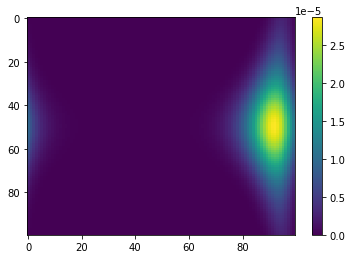

In [29]:
plt.imshow(intensity_data,interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

In [34]:
intensity_data

array([[2.67064833e-07, 8.32115519e-08, 1.32912565e-08, ...,
        1.82222028e-06, 1.19662776e-06, 6.39988153e-07],
       [2.90163268e-07, 9.46572999e-08, 1.73646717e-08, ...,
        1.91044127e-06, 1.25899795e-06, 6.80224099e-07],
       [3.15591452e-07, 1.07618281e-07, 2.23235114e-08, ...,
        2.00434841e-06, 1.32586680e-06, 7.23810984e-07],
       ...,
       [3.15557450e-07, 1.07637257e-07, 2.23159207e-08, ...,
        2.00440413e-06, 1.32580868e-06, 7.23860336e-07],
       [2.90130032e-07, 9.46755374e-08, 1.73578724e-08, ...,
        1.91049650e-06, 1.25894055e-06, 6.80273165e-07],
       [2.67032369e-07, 8.32291121e-08, 1.32852495e-08, ...,
        1.82227479e-06, 1.19657096e-06, 6.40036915e-07]])

In [30]:
#ptychographical algorithm

#random INITIAL guess for object function (in frequency space)
obj_amp_guess= np.random.random((len(exp_data)))
obj_phase_guess= np.random.random((len(exp_data)))





NameError: name 'fourier_img_data_guess' is not defined

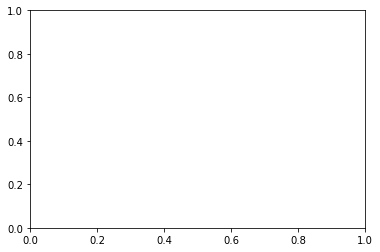

In [31]:
    fig,ax= plt.subplots()
    ax.plot(img_freq,2/len(fourier_img_data_guess)*abs(fourier_img_data_guess)**2)
    plt.show()

In [32]:
#illuminate object with probe
obj_data_guess = obj_amp_guess*np.exp(1j*obj_phase_guess)
img_data_guess= obj_data_guess*mask_data
for pos in range(99):
    #plot the guess
    fourier_img_data_guess= np.fft.ifft(img_data_guess)
    #extract the image phase from the guess
    img_phase_guess = np.angle(fourier_img_data_guess)
    img_amp = np.sqrt(intensity_data[pos])#from experiment
    img_data_guess = img_amp*np.exp(1j*img_phase_guess)
    obj_data_guess = 0.1*obj_data_guess+0.1*np.fft.fft(img_data_guess) #weiner filter

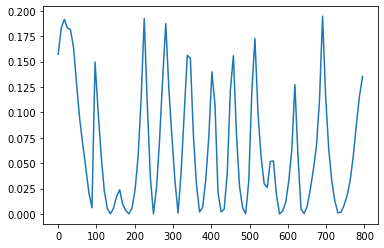

In [33]:
#plot the guess
fig,ax= plt.subplots()
ax.plot(img_freq,2/len(obj_data_guess)*np.angle(obj_data_guess)**2)
plt.show()

In [ ]:
#Weiner filter

In [89]:
x=[]


In [90]:
x.append("a")

In [92]:
x.append("b")

In [94]:
x.append([3,4])


In [95]:
x

['a', 'b', [3, 4]]

In [96]:
x.append([5,6])

In [97]:
x

['a', 'b', [3, 4], [5, 6]]

In [98]:
y=[3,4]

In [99]:
y.append([5,6])

In [100]:
y

[3, 4, [5, 6]]

In [114]:
range(0,100,20)

range(0, 100, 20)

In [142]:
for x in np.linspace(0,1,11):
  print(x)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
